# Homework 1

## 1. Ohm’s Law with Linear Regression:

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd

# Read dataset
ohms_law = pd.read_csv("OhmsLaw.csv")
ohms_law.head()

,Unnamed: 0,Voltage,Current
0,0,1.000000,0.010440
1,1,1.002002,0.011119
2,2,1.004004,0.011387
3,3,1.006006,0.009052
4,4,1.008008,0.010713


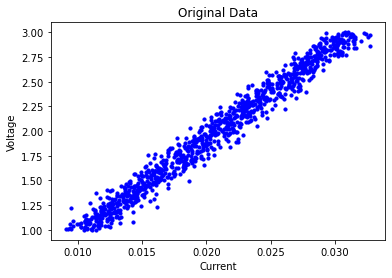

In [3]:
import matplotlib.pyplot as plt

# Plot original data
V = ohms_law["Voltage"].to_numpy()
I = ohms_law["Current"].to_numpy()
plt.scatter(I, V,  color='blue', s=10)
plt.xlabel("Current"); plt.ylabel("Voltage"), plt.title("Original Data")
plt.show()

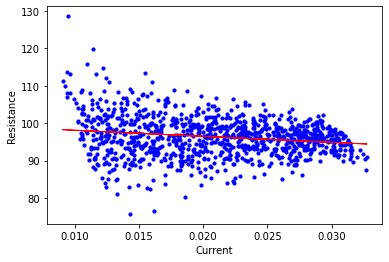

In [4]:
from sklearn.linear_model import LinearRegression

# Since the data is not centered, we need intercept
lr = LinearRegression()
X = I.reshape(-1, 1)
y_true = V / I
lr.fit(X, y_true)
y_pred = lr.predict(X)

# Plot original data and regression line on the same graph
def plot_graph(X, y_true, y_pred, xlab):
    plt.scatter(X, y_true,  color='blue', s=10)
    plt.plot(X, y_pred, color='red', linewidth=1)
    plt.ylabel('Resistance')
    plt.xlabel(str(xlab))
    plt.show()

plot_graph(X, y_true, y_pred, "Current")

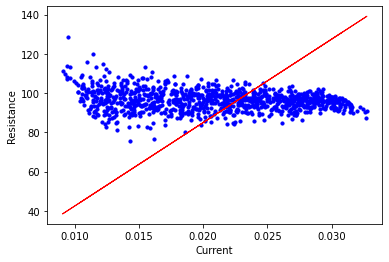

In [5]:
# However, following the HINT given in the question, turn off the intercept term
lr = LinearRegression(fit_intercept=False)
X = I.reshape(-1, 1)
y_true = V / I
lr.fit(X, y_true)
y_pred = lr.predict(X)
plot_graph(X, y_true, y_pred, "Current")

## 2. Miles Per Gallon Prediction using Multi-Linear Regression

In [6]:
# Read dataset

auto_dataset_train = pd.read_csv('auto_dataset_train.csv')
auto_dataset_train.head()

,cylinders,weight,acceleration,model_year,mpg
0,8,3504,12.0,70,18.0
1,8,3693,11.5,70,15.0
2,8,3436,11.0,70,18.0
3,8,3433,12.0,70,16.0
4,8,3449,10.5,70,17.0


In [7]:
import numpy as np

# Compute the standard deviation in mpg
mpg_sd = np.std(auto_dataset_train[["mpg"]])
print("standard deviation (SD) in miles per gallon is {:.3f}".format(mpg_sd[0]))

standard deviation (SD) in miles per gallon is 6.274


In [8]:
from sklearn.metrics import mean_squared_error

# Fit a multi- regression linear model
X = auto_dataset_train[["cylinders", "weight", "acceleration", "model_year"]].to_numpy()
y_true = auto_dataset_train["mpg"].to_numpy()
lr = LinearRegression()
lr.fit(X, y_true)
y_pred = lr.predict(X)

# Compute RMSE
mse = mean_squared_error(y_true, y_pred)
print('Mean squared error using mean_squared_error method: %.3f'%mse)

Mean squared error using mean_squared_error method: 7.201


**Compare the 𝑅𝑀𝑆𝐸 to the 𝑆𝐷, what does this imply about the linear model?** <br>
Here the RMSE= 7.201 and SD= 6.274. This means that the predicted values are very close the mean value of the training data.

In [9]:
# test the trained model on a new data set

auto_dataset_test = pd.read_csv('auto_dataset_test.csv')
auto_dataset_test.head()
X_test = auto_dataset_test[["cylinders", "weight", "acceleration", "model_year"]].to_numpy()
y_test = auto_dataset_test["mpg"].to_numpy()
y_pred_test = lr.predict(X_test)

# Compute RMSE
mse = mean_squared_error(y_test, y_pred_test)
print('Mean squared error using mean_squared_error method: %.3f'%mse)

Mean squared error using mean_squared_error method: 36.777


**Discuss some improvements or changes you would make to this model** <br>
- more training data
- normalize the data
- use logistic regression

## 3. Digit Classification

In [10]:
# Load the given train and test files

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

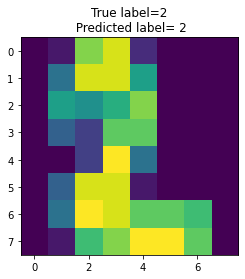

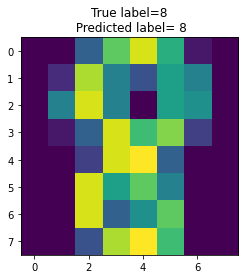

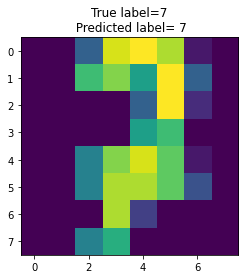

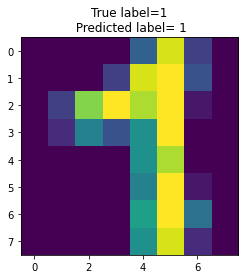

In [11]:
# train a perceptron model

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
pred_labels = clf.predict(X_train)
nth = [5, 111, 584, 1200]

for n in nth:
    true_lab = y_train[n]
    pred_lab = pred_labels[n]
    plt.imshow(X_train[n,:].reshape([8,8]))
    title = "True label=" + str(true_lab) + "\n Predicted label= "+str(pred_lab)
    plt.title(title)
    plt.show()

In [12]:
# determine accuracy of the model on train data
acc = clf.score(X_train, y_train)
print("Perceptron model acuracy: {:.2f}%".format(acc*100))

Perceptron model acuracy: 96.98%


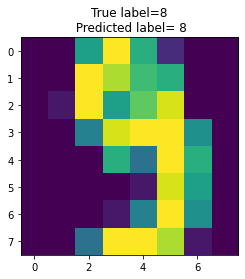

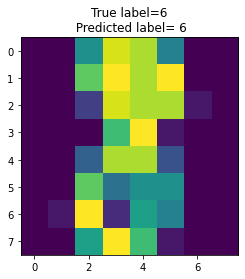

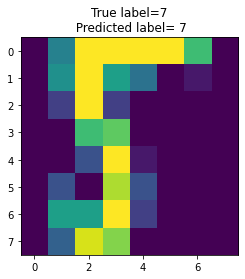

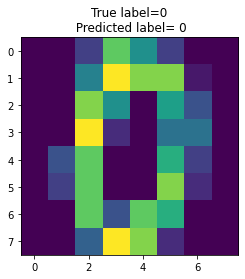

In [13]:
# Test the model trained aboove on given test data
test_pred_labels = clf.predict(X_test)
nth = [19, 48, 336, 529]

for n in nth:
    true_lab = y_test[n]
    pred_lab = test_pred_labels[n]
    plt.imshow(X_train[n,:].reshape([8,8]))
    title = "True label=" + str(true_lab) + "\n Predicted label= "+str(pred_lab)
    plt.title(title)
    plt.show()

In [14]:
# determine accuracy of the model on test data

acc = clf.score(X_test, y_test)
print("Perceptron model acuracy: {:.2f}%".format(acc*100))

Perceptron model acuracy: 94.44%


**Discuss any changes you would make to the model** <br>
- Use a different classifier like SVM
- or a better idea- use MLP classifier